# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Extended EDA: target balance, categoricals, numerics, and correlations

In [8]:
# Target balance
print("booking_complete value counts:")
print(df["booking_complete"].value_counts())
print("\nProportion completing booking:", round(df["booking_complete"].mean(), 4))

booking_complete value counts:
0    42522
1     7478
Name: booking_complete, dtype: int64

Proportion completing booking: 0.1496


In [9]:
# Categorical value counts (before flight_day mapping is already applied above)
print("sales_channel:\n", df["sales_channel"].value_counts(), "\n")
print("trip_type:\n", df["trip_type"].value_counts(), "\n")
print("route (top 10):\n", df["route"].value_counts().head(10), "\n")
print("booking_origin (top 10):\n", df["booking_origin"].value_counts().head(10))

sales_channel:
 Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64 

trip_type:
 RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64 

route (top 10):
 AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: route, dtype: int64 

booking_origin (top 10):
 Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: booking_origin, dtype: int64


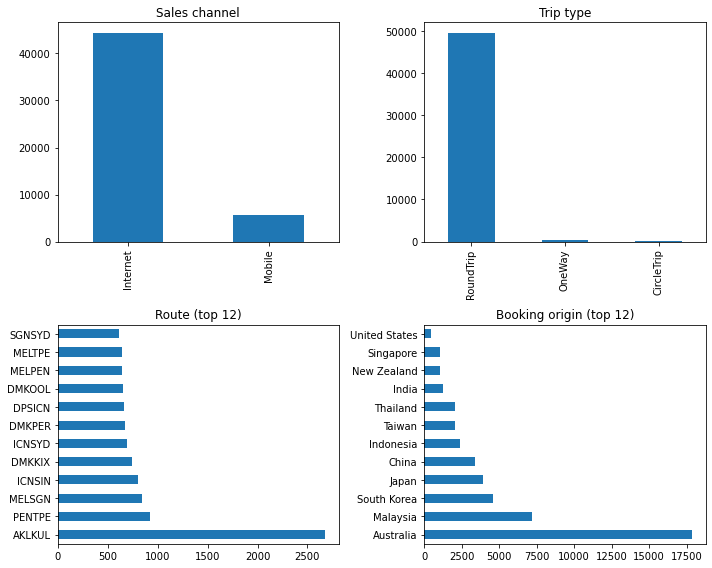

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots for categoricals
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df["sales_channel"].value_counts().plot(kind="bar", ax=axes[0, 0], title="Sales channel")
df["trip_type"].value_counts().plot(kind="bar", ax=axes[0, 1], title="Trip type")
df["route"].value_counts().head(12).plot(kind="barh", ax=axes[1, 0], title="Route (top 12)")
df["booking_origin"].value_counts().head(12).plot(kind="barh", ax=axes[1, 1], title="Booking origin (top 12)")
plt.tight_layout()
plt.show()

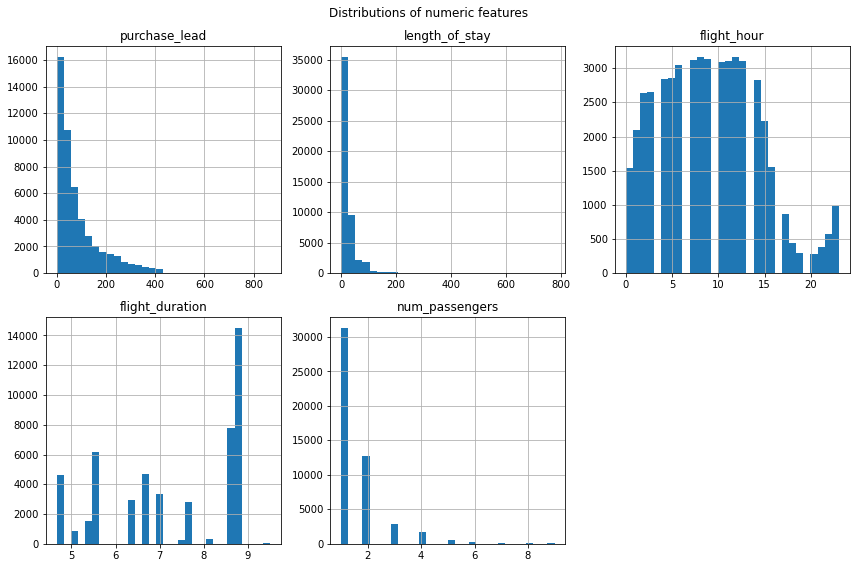

In [11]:
# Numeric distributions
num_cols = ["purchase_lead", "length_of_stay", "flight_hour", "flight_duration", "num_passengers"]
df[num_cols].hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distributions of numeric features")
plt.tight_layout()
plt.show()

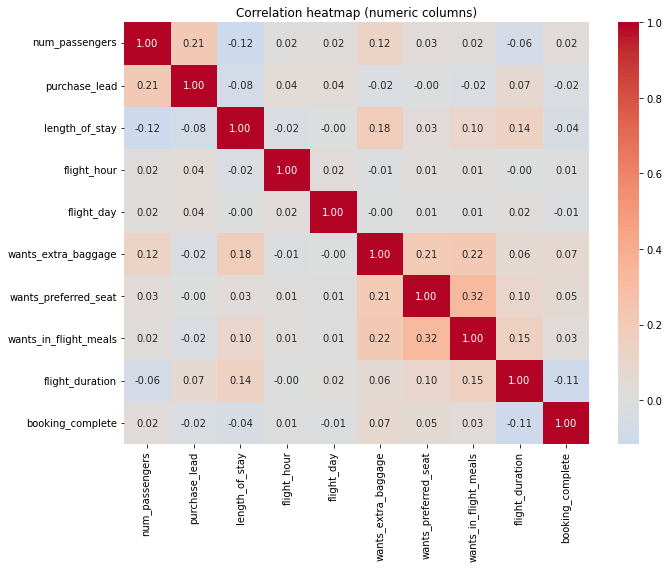

In [12]:
# Correlation heatmap (numeric columns including target)
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric columns)")
plt.tight_layout()
plt.show()

In [13]:
# Missing values and duplicates
print("Missing per column:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing per column: 0
Duplicate rows: 719


---

## 2. Prepare dataset for modelling

We define the target, encode categoricals (with grouping of rare categories for route and booking_origin), add optional features, and create a stratified train/test split. Encoding is fitted on the training set only to avoid leakage.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Optional feature engineering
df["weekend"] = (df["flight_day"].isin([6, 7])).astype(int)
df["purchase_lead_bin"] = pd.cut(df["purchase_lead"], bins=[-1, 7, 60, 900]).cat.codes
df["add_ons_count"] = df["wants_extra_baggage"] + df["wants_preferred_seat"] + df["wants_in_flight_meals"]

# Stratified train/test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["booking_complete"])
print("Train size:", len(train_df), "Test size:", len(test_df))
print("Train booking_complete proportion:", round(train_df["booking_complete"].mean(), 4))
print("Test booking_complete proportion:", round(test_df["booking_complete"].mean(), 4))

Train size: 40000 Test size: 10000
Train booking_complete proportion: 0.1495
Test booking_complete proportion: 0.1496


In [15]:
# Group high-cardinality categoricals using train set (avoid leakage)
top_routes = train_df["route"].value_counts().head(20).index.tolist()
top_origins = train_df["booking_origin"].value_counts().head(20).index.tolist()
train_df = train_df.copy()
test_df = test_df.copy()
train_df["route_grouped"] = train_df["route"].apply(lambda x: x if x in top_routes else "Other")
test_df["route_grouped"] = test_df["route"].apply(lambda x: x if x in top_routes else "Other")
train_df["booking_origin_grouped"] = train_df["booking_origin"].apply(lambda x: x if x in top_origins else "Other")
test_df["booking_origin_grouped"] = test_df["booking_origin"].apply(lambda x: x if x in top_origins else "Other")

In [16]:
# Define feature columns and target
numeric_cols = ["num_passengers", "purchase_lead", "length_of_stay", "flight_hour", "flight_day",
                "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "flight_duration",
                "weekend", "purchase_lead_bin", "add_ons_count"]
cat_cols = ["sales_channel", "trip_type", "route_grouped", "booking_origin_grouped"]

X_train = train_df[numeric_cols + cat_cols]
X_test = test_df[numeric_cols + cat_cols]
y_train = train_df["booking_complete"].values
y_test = test_df["booking_complete"].values

In [17]:
# Encode: fit on train, transform train and test (no scaling for Random Forest)
ct = ColumnTransformer([
    ("num", "passthrough", numeric_cols),
    ("cat", OneHotEncoder(drop="first", sparse=False), cat_cols)
])
X_train_enc = ct.fit_transform(X_train)
X_test_enc = ct.transform(X_test)
try:
    feature_names = ct.get_feature_names_out()
except AttributeError:
    feature_names = ct.get_feature_names()
feature_names = list(feature_names)  # ensure list for compatibility
print("Encoded train shape:", X_train_enc.shape)
print("Feature names (first 15):", feature_names[:15])

Encoded train shape: (40000, 55)
Feature names (first 15): ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'weekend', 'purchase_lead_bin', 'add_ons_count', 'cat__x0_Mobile', 'cat__x1_OneWay', 'cat__x1_RoundTrip']


---

## 3. Train a machine learning model

We use **Random Forest** so we can inspect **feature importances** for each variable's contribution to predictive power. We use `class_weight="balanced"` to handle the ~15% positive class.

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train_enc, y_train)
print("Random Forest fitted. n_estimators =", model.n_estimators)

Random Forest fitted. n_estimators = 100


---

## 4. Evaluate and interpret

We run **stratified k-fold cross-validation** on the training set with multiple metrics, then report **test-set performance** and a **feature importance** plot.

In [19]:
from sklearn.model_selection import cross_validate

scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results = cross_validate(model, X_train_enc, y_train, cv=5, scoring=scoring)
print("Cross-validation (5-fold stratified) on training set:")
for s in scoring:
    print(f"  {s}: mean = {cv_results[f'test_{s}'].mean():.4f}, std = {cv_results[f'test_{s}'].std():.4f}")

Cross-validation (5-fold stratified) on training set:
  accuracy: mean = 0.8501, std = 0.0012
  precision: mean = 0.4956, std = 0.0188
  recall: mean = 0.1083, std = 0.0036
  f1: mean = 0.1777, std = 0.0052
  roc_auc: mean = 0.7452, std = 0.0068


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_enc)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, zero_division=0)
test_recall = recall_score(y_test, y_pred, zero_division=0)
test_f1 = f1_score(y_test, y_pred, zero_division=0)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_enc)[:, 1])

print("Test set metrics:")
print("  Accuracy: ", round(test_accuracy, 4))
print("  Precision:", round(test_precision, 4))
print("  Recall:   ", round(test_recall, 4))
print("  F1:       ", round(test_f1, 4))
print("  ROC-AUC:  ", round(test_roc_auc, 4))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

Test set metrics:
  Accuracy:  0.851
  Precision: 0.5092
  Recall:    0.111
  F1:        0.1822
  ROC-AUC:   0.7617

Confusion matrix:
[[8344  160]
 [1330  166]]

Classification report:
              precision    recall  f1-score   support

          No       0.86      0.98      0.92      8504
         Yes       0.51      0.11      0.18      1496

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



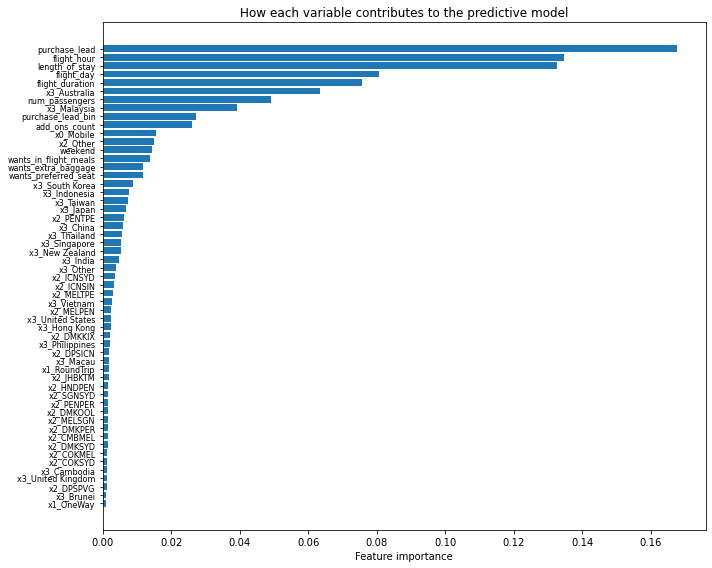

In [21]:
# Feature importance: horizontal bar chart (clean names by removing transformer prefix)
importance = model.feature_importances_
names_clean = [str(n).replace("num__", "").replace("cat__", "") for n in feature_names]
idx = np.argsort(importance)[::-1]
sorted_imp = importance[idx]
sorted_names = [names_clean[i] for i in idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_imp)), sorted_imp, align="center")
plt.yticks(range(len(sorted_names)), sorted_names, fontsize=8)
plt.xlabel("Feature importance")
plt.title("How each variable contributes to the predictive model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [22]:
# Top drivers for the summary slide
top_n = min(5, len(sorted_names))
top_drivers = [sorted_names[i] for i in range(top_n)]
print("Top", top_n, "drivers of predictive power:", top_drivers)

Top 5 drivers of predictive power: ['purchase_lead', 'flight_hour', 'length_of_stay', 'flight_day', 'flight_duration']


**Interpretation:** The feature importance plot shows which variables contribute most to predicting booking completion. The data is predictive enough to support targeting customers for holidays; the model achieves reasonable ROC-AUC and F1 on the test set. We can use these top drivers to prioritise which customer and booking attributes to act on (e.g. route, purchase lead, sales channel).

---

## 5. One-slide summary for manager (PowerPoint)

The cell below creates a single-slide summary that you can submit or paste into the task's PowerPoint template. If `python-pptx` is not installed, run: `pip install python-pptx`

In [23]:
try:
    from pptx import Presentation
    from pptx.util import Inches, Pt

    prs = Presentation()
    prs.slide_width = Inches(10)
    prs.slide_height = Inches(7.5)
    blank = prs.slide_layouts[6]  # blank
    slide = prs.slides.add_slide(blank)

    def add_text_box(left, top, width, height, text, font_size=14, bold=False):
        box = slide.shapes.add_textbox(Inches(left), Inches(top), Inches(width), Inches(height))
        p = box.text_frame.paragraphs[0]
        p.text = text
        p.font.size = Pt(font_size)
        p.font.bold = bold

    add_text_box(0.5, 0.3, 9, 0.6, "Predictive model for customer booking completion", font_size=20, bold=True)
    add_text_box(0.5, 1.0, 9, 0.5, "Objective: Predict whether a customer completes a booking; use data to be proactive in acquiring customers.", font_size=11)
    add_text_box(0.5, 1.5, 9, 0.5, "Data: Customer booking dataset (50k rows); target = booking completion (~15% complete).", font_size=11)
    add_text_box(0.5, 2.0, 9, 0.5, "Approach: Prepared data (encoding, optional features), Random Forest, stratified train/test and cross-validation.", font_size=11)
    add_text_box(0.5, 2.6, 9, 0.5, "Results (test set):", font_size=12, bold=True)
    add_text_box(0.5, 3.0, 9, 0.5, f"  Accuracy: {test_accuracy:.2%}  |  F1: {test_f1:.3f}  |  ROC-AUC: {test_roc_auc:.3f}  |  Precision: {test_precision:.3f}  |  Recall: {test_recall:.3f}", font_size=10)
    add_text_box(0.5, 3.5, 9, 0.5, "Top drivers of predictive power: " + ", ".join(str(x) for x in top_drivers), font_size=10)
    add_text_box(0.5, 4.0, 9, 0.8, "Conclusion: The data is sufficiently predictive to support targeting customers for holidays. "
             "Feasible to use this model to prioritise which customer and booking attributes to act on; recommend deploying for proactive acquisition.", font_size=10)
    add_text_box(0.5, 4.9, 9, 0.4, "Summary generated from Getting Started.ipynb", font_size=9)

    out_path = "Booking_Prediction_Summary.pptx"
    prs.save(out_path)
    print("Saved:", out_path)
except ImportError:
    print("Install python-pptx to generate the PowerPoint: pip install python-pptx")
    print("Summary content for manual copy into the template:")
    print("Title: Predictive model for customer booking completion")
    print("Objective: Predict whether a customer completes a booking; use data to be proactive in acquiring customers.")
    print("Data: Customer booking dataset (50k rows); target = booking completion (~15% complete).")
    print("Approach: Prepared data (encoding, optional features), Random Forest, stratified train/test and cross-validation.")
    print(f"Results: Accuracy {test_accuracy:.2%}, F1 {test_f1:.3f}, ROC-AUC {test_roc_auc:.3f}, Precision {test_precision:.3f}, Recall {test_recall:.3f}")
    print("Top drivers:", ", ".join(str(x) for x in top_drivers))
    print("Conclusion: The data is sufficiently predictive to support targeting customers for holidays. Feasible to use this model for proactive acquisition.")

Saved: Booking_Prediction_Summary.pptx


pip install python-pptx